In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [2]:
portuguese = pd.read_csv('../../data/raw/student-por.csv', delimiter=';')

In [3]:
#Gather descriptive stats on Portuguese class dataframe
portuguese.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [4]:
portuguese.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [5]:
portuguese.shape

(649, 33)

In [6]:
portuguese.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

### Rename

In [7]:
# names may be verbose but I find them more descriptive
column_map = {
    "Pstatus": "parent_cohabitation_status",
    "Medu": "mother's_edu",
    "Fedu": "father's_edu",
    "Fjob": "father's_job",
    "Mjob": "mother's_job",
    "reason": "reason_to_choose_school",
    "schoolsup": "extra_edu_support",
    "famsup": "family_edu_support",
    "paid":"extra_paid_classes",
    "activites": "extra_cirricular_activites",
    "nursery": "attended_nursery",
    "higher": "interested_in_higher_edu",
    "internet": "internet_access",
    "romantic": "in_romantic_relationship",
    "famrel": "quality_of_fam_time",
    "freetime": "free_time_after_school",
    "goout": "goes_out_with_friends",
    "Dalc": "daily_alcohol_consumption",
    "Walc": "weekend_alcohol_consumption",
    "health": "current_health_status",
    "G1": "first_grade_period",
    "G2": "second_grade_period",
    "G3": "final_grade"
}

portuguese = portuguese.rename(columns=column_map)
portuguese.head()

,school,sex,age,address,famsize,parent_cohabitation_status,mother's_edu,father's_edu,mother's_job,father's_job,...,quality_of_fam_time,free_time_after_school,goes_out_with_friends,daily_alcohol_consumption,weekend_alcohol_consumption,current_health_status,absences,first_grade_period,second_grade_period,final_grade
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


### Grade period Histograms

(array([  1.,   0.,   7.,  42., 107., 186., 154., 106.,  38.,   8.]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]),
 <BarContainer object of 10 artists>)

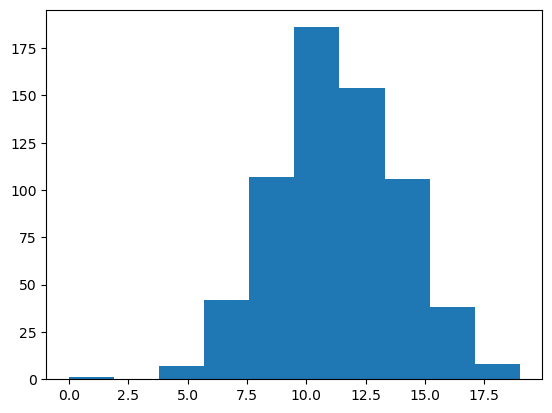

In [8]:
#Histogram for 1st period grades of Portuguese class
plt.hist(portuguese['first_grade_period'])

(array([  7.,   0.,   3.,  23., 112., 186., 166.,  92.,  45.,  15.]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]),
 <BarContainer object of 10 artists>)

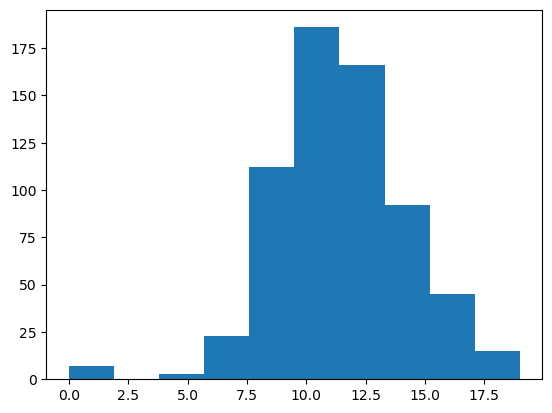

In [9]:
#Histogram for 2nd period grades of Portuguese class
plt.hist(portuguese['second_grade_period'])

(array([ 16.,   0.,   1.,  13.,  70., 201., 154., 112.,  65.,  17.]),
 array([ 0. ,  1.9,  3.8,  5.7,  7.6,  9.5, 11.4, 13.3, 15.2, 17.1, 19. ]),
 <BarContainer object of 10 artists>)

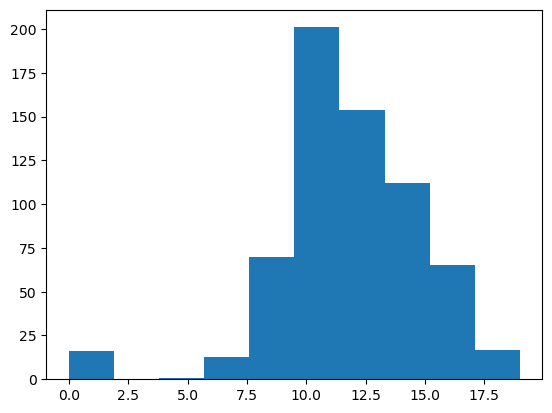

In [10]:
#Histogram for 3rd period grades of Portuguese class
plt.hist(portuguese['final_grade'])

### Internet access

In [11]:
#Get value counts of internet column
internet_access_p = portuguese.value_counts('internet_access')
internet_access_p

internet_access
yes    498
no     151
Name: count, dtype: int64

<Axes: xlabel='internet_access'>

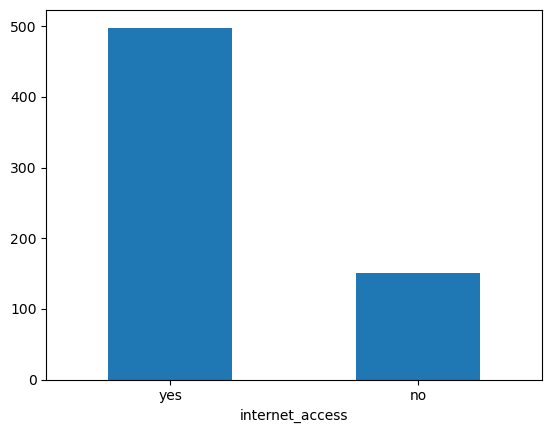

In [12]:
#Bar chart of students with internet access in Portuguese class
internet_access_p.plot.bar(rot=0)

<Axes: xlabel='internet_access', ylabel='first_grade_period'>

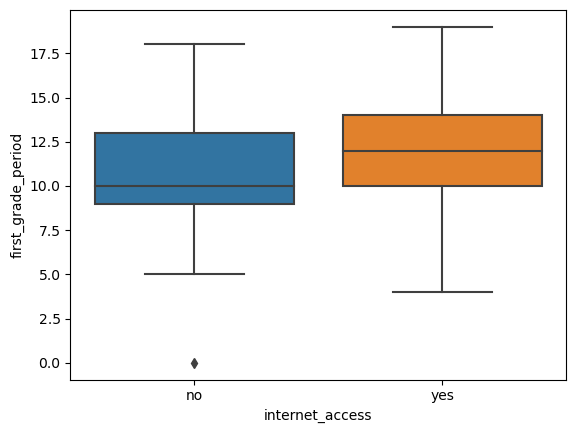

In [13]:
#Boxplot comparing internet access and 1st period grades
sns.boxplot(data=portuguese, x='internet_access', y='first_grade_period')

<Axes: xlabel='internet_access', ylabel='second_grade_period'>

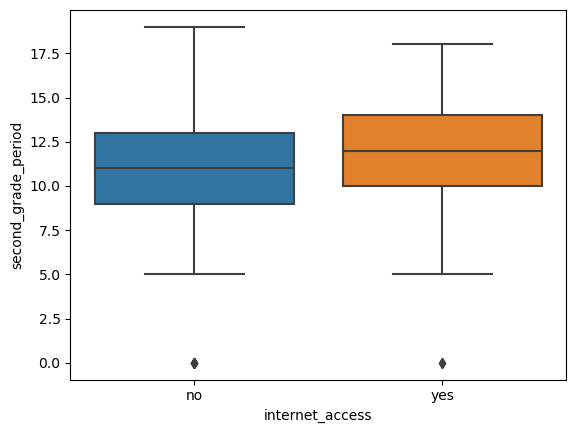

In [14]:
#Boxplot comparing internet access and 2nd period grades
sns.boxplot(data=portuguese, x='internet_access', y='second_grade_period')

<Axes: xlabel='internet_access', ylabel='final_grade'>

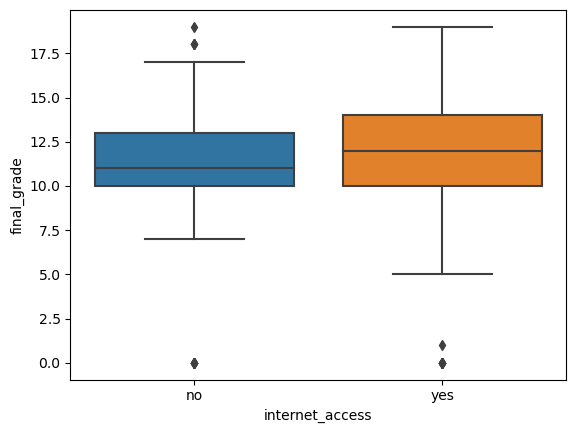

In [15]:
#Boxplot comparing internet access and 3rd period grades
sns.boxplot(data=portuguese, x='internet_access', y='final_grade')

### Relationships with Target Variable (final grade)

In [16]:
portuguese.columns

Index(['school', 'sex', 'age', 'address', 'famsize',
       'parent_cohabitation_status', 'mother's_edu', 'father's_edu',
       'mother's_job', 'father's_job', 'reason_to_choose_school', 'guardian',
       'traveltime', 'studytime', 'failures', 'extra_edu_support',
       'family_edu_support', 'extra_paid_classes', 'activities',
       'attended_nursery', 'interested_in_higher_edu', 'internet_access',
       'in_romantic_relationship', 'quality_of_fam_time',
       'free_time_after_school', 'goes_out_with_friends',
       'daily_alcohol_consumption', 'weekend_alcohol_consumption',
       'current_health_status', 'absences', 'first_grade_period',
       'second_grade_period', 'final_grade'],
      dtype='object')

<Axes: xlabel='school', ylabel='final_grade'>

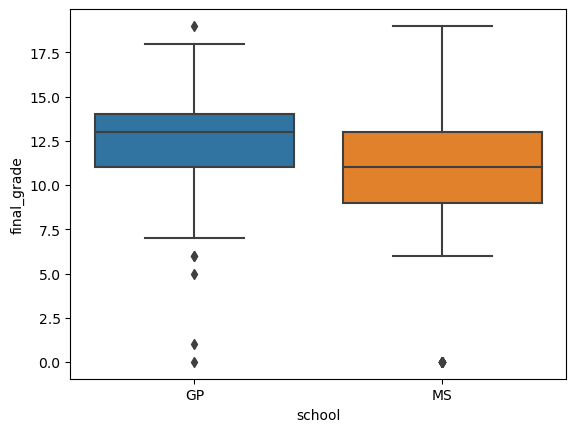

In [17]:
sns.boxplot(data=portuguese, x='school', y='final_grade')

<Axes: xlabel='sex', ylabel='final_grade'>

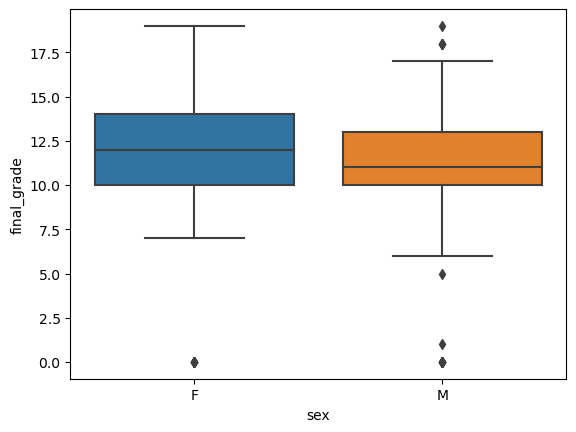

In [18]:
sns.boxplot(data=portuguese, x='sex', y='final_grade')

<Axes: xlabel='age', ylabel='final_grade'>

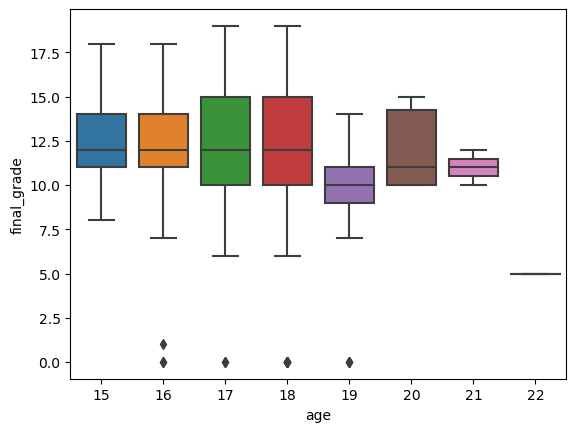

In [19]:
sns.boxplot(data=portuguese, x='age', y='final_grade')

<Axes: xlabel='address', ylabel='final_grade'>

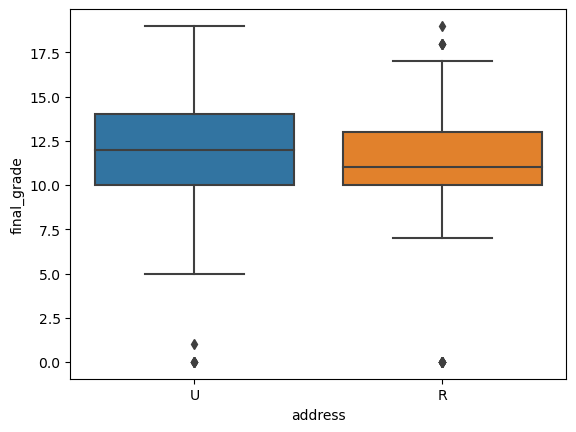

In [20]:
sns.boxplot(data=portuguese, x='address', y='final_grade')

<Axes: xlabel='famsize', ylabel='final_grade'>

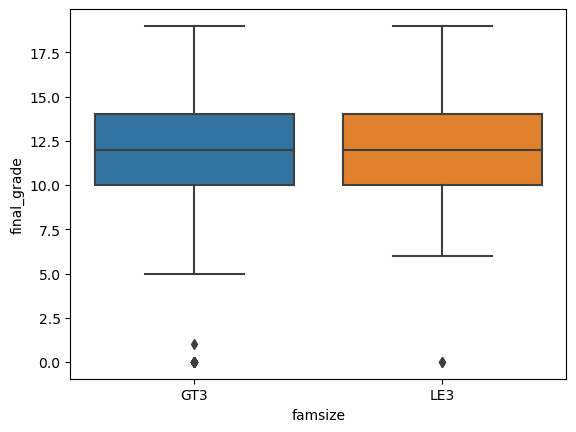

In [21]:
sns.boxplot(data=portuguese, x='famsize', y='final_grade')

<Axes: xlabel='parent_cohabitation_status', ylabel='final_grade'>

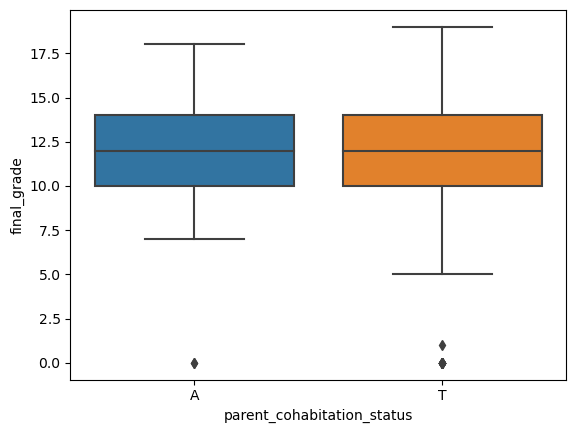

In [22]:
sns.boxplot(data=portuguese, x='parent_cohabitation_status', y='final_grade')

<Axes: xlabel="mother's_edu", ylabel='final_grade'>

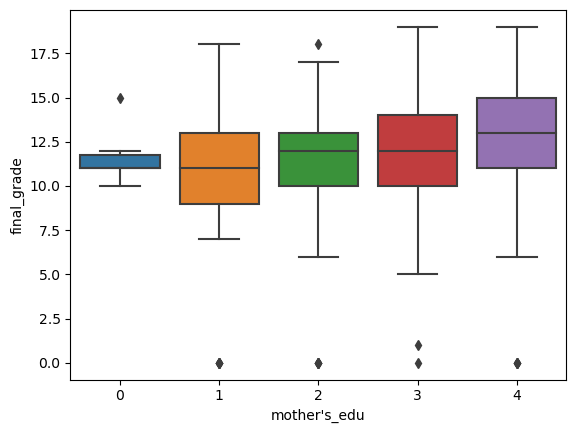

In [23]:
sns.boxplot(data=portuguese, x="mother's_edu", y='final_grade')

<Axes: xlabel="father's_edu", ylabel='final_grade'>

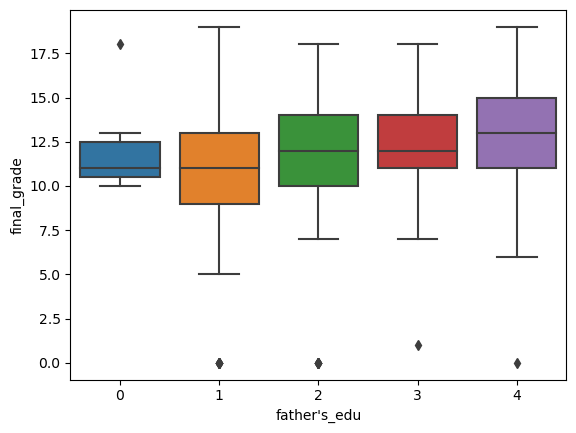

In [24]:
sns.boxplot(data=portuguese, x="father's_edu", y='final_grade')

<Axes: xlabel="mother's_job", ylabel='final_grade'>

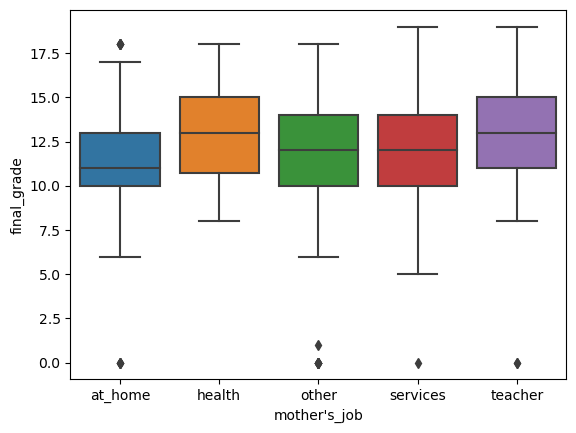

In [25]:
sns.boxplot(data=portuguese, x="mother's_job", y='final_grade')

<Axes: xlabel="father's_job", ylabel='final_grade'>

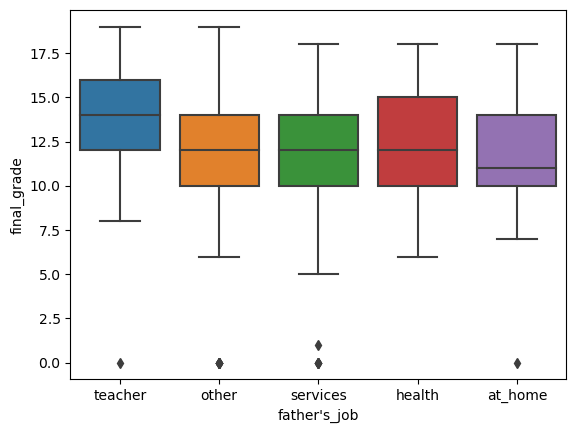

In [26]:
sns.boxplot(data=portuguese, x="father's_job", y='final_grade')

<Axes: xlabel='reason_to_choose_school', ylabel='final_grade'>

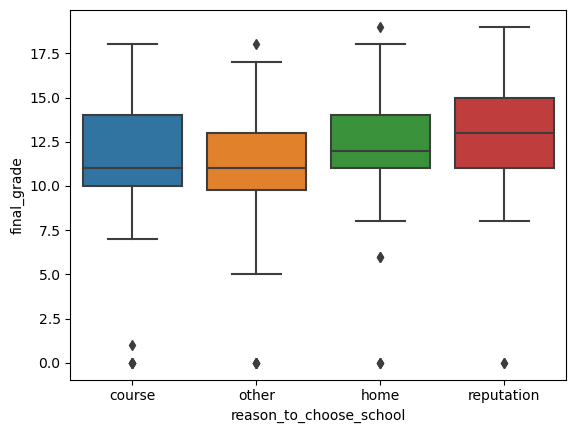

In [27]:
sns.boxplot(data=portuguese, x="reason_to_choose_school", y='final_grade')

<Axes: xlabel='guardian', ylabel='final_grade'>

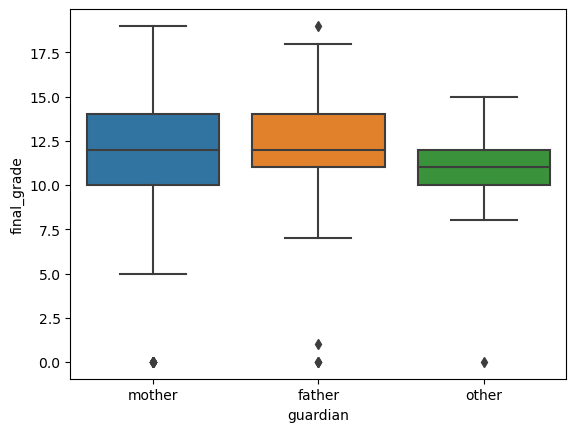

In [28]:
sns.boxplot(data=portuguese, x="guardian", y='final_grade')

<Axes: xlabel='traveltime', ylabel='final_grade'>

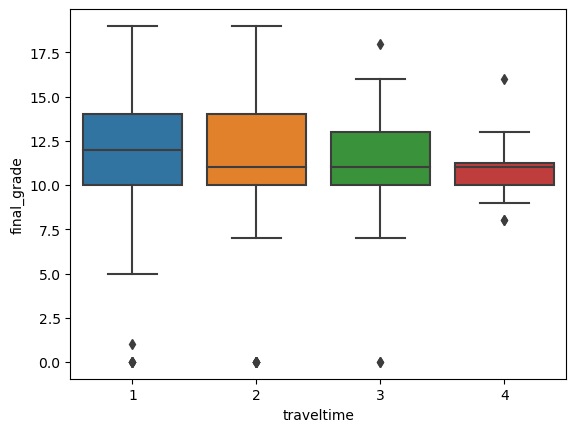

In [29]:
sns.boxplot(data=portuguese, x="traveltime", y='final_grade')

<Axes: xlabel='studytime', ylabel='final_grade'>

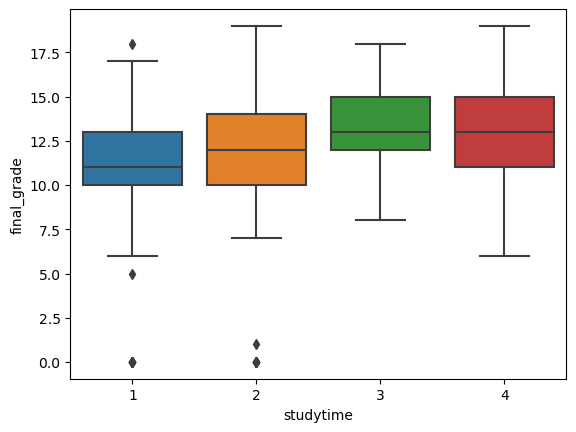

In [30]:
sns.boxplot(data=portuguese, x="studytime", y='final_grade')

<Axes: xlabel='failures', ylabel='final_grade'>

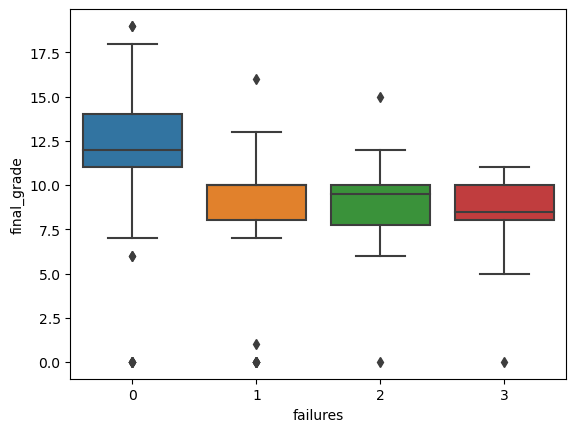

In [31]:
sns.boxplot(data=portuguese, x="failures", y='final_grade')

<Axes: xlabel='extra_edu_support', ylabel='final_grade'>

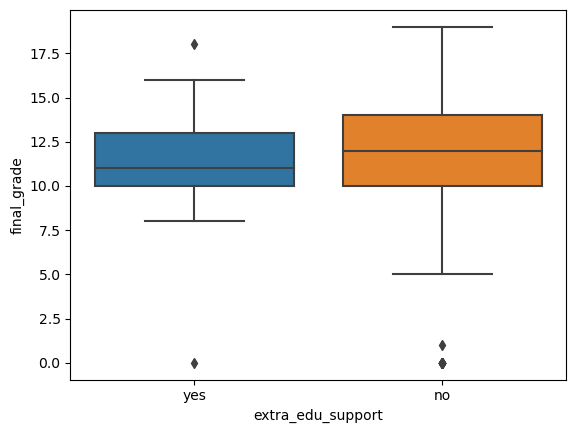

In [32]:
sns.boxplot(data=portuguese, x="extra_edu_support", y='final_grade')

<Axes: xlabel='extra_paid_classes', ylabel='final_grade'>

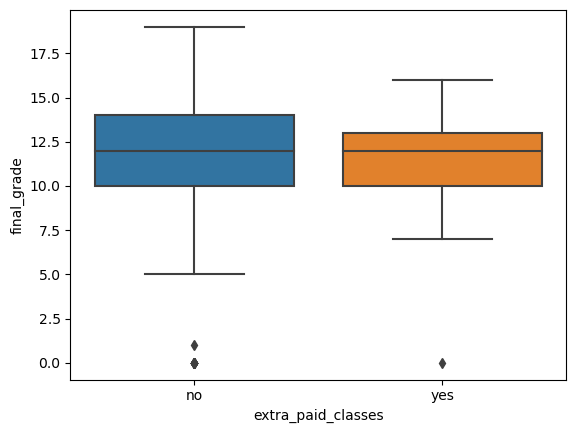

In [33]:
sns.boxplot(data=portuguese, x="extra_paid_classes", y='final_grade')

<Axes: xlabel='activities', ylabel='final_grade'>

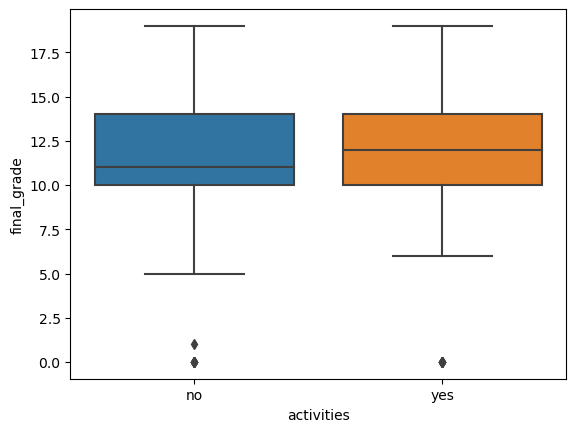

In [34]:
sns.boxplot(data=portuguese, x="activities", y='final_grade')

<Axes: xlabel='attended_nursery', ylabel='final_grade'>

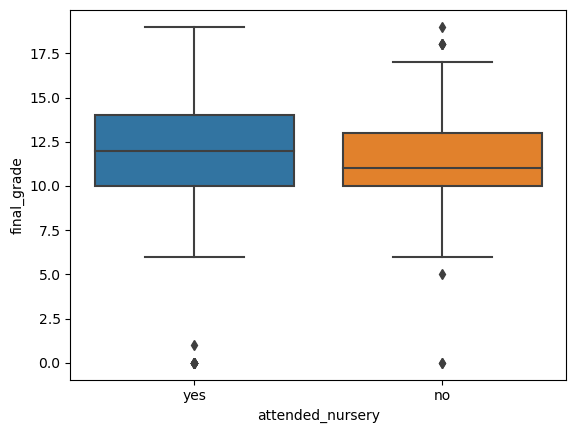

In [35]:
sns.boxplot(data=portuguese, x="attended_nursery", y='final_grade')

<Axes: xlabel='interested_in_higher_edu', ylabel='final_grade'>

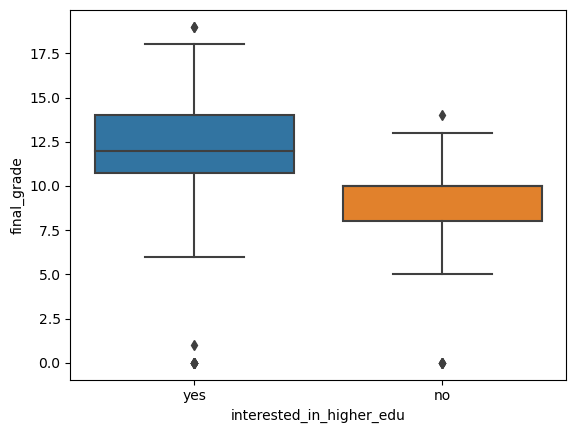

In [36]:
sns.boxplot(data=portuguese, x="interested_in_higher_edu", y='final_grade')

<Axes: xlabel='internet_access', ylabel='final_grade'>

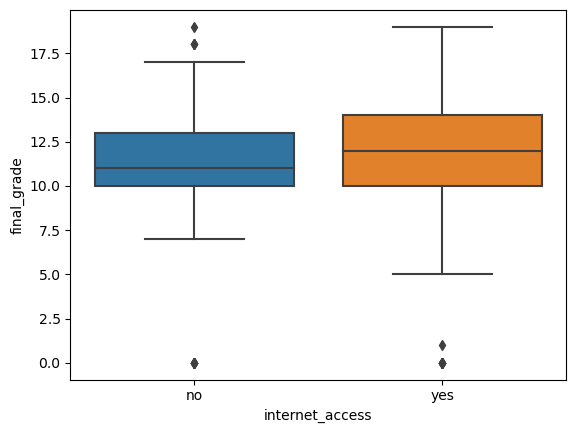

In [37]:
sns.boxplot(data=portuguese, x="internet_access", y='final_grade')

<Axes: xlabel='in_romantic_relationship', ylabel='final_grade'>

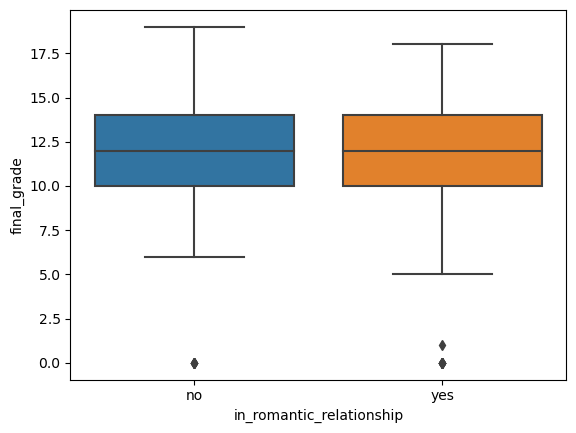

In [38]:
sns.boxplot(data=portuguese, x="in_romantic_relationship", y='final_grade')

<Axes: xlabel='quality_of_fam_time', ylabel='final_grade'>

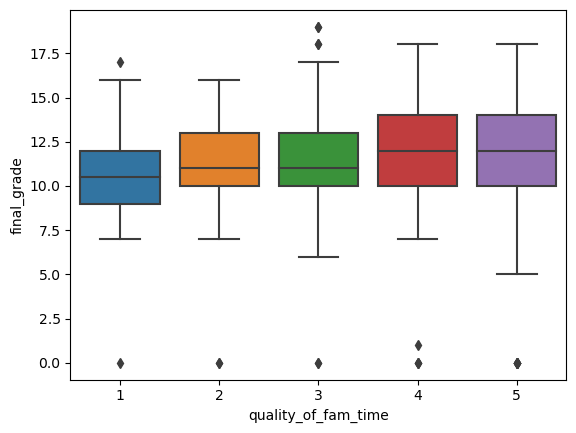

In [39]:
sns.boxplot(data=portuguese, x="quality_of_fam_time", y='final_grade')

<Axes: xlabel='free_time_after_school', ylabel='final_grade'>

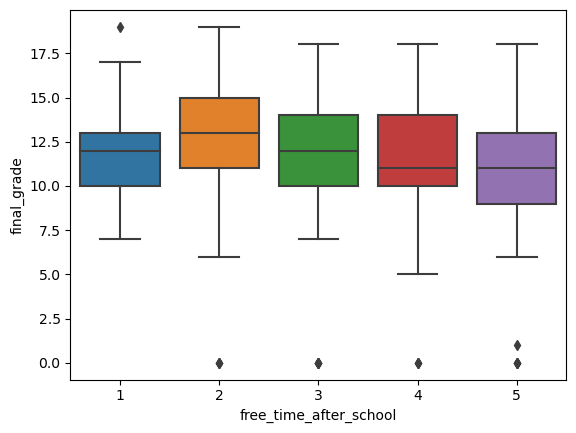

In [40]:
sns.boxplot(data=portuguese, x="free_time_after_school", y='final_grade')

<Axes: xlabel='goes_out_with_friends', ylabel='final_grade'>

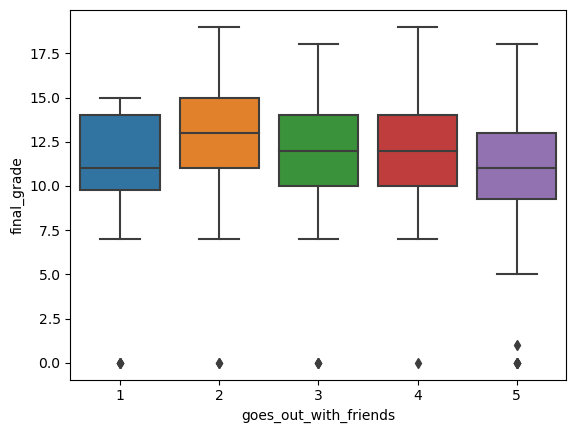

In [41]:
sns.boxplot(data=portuguese, x="goes_out_with_friends", y='final_grade')

<Axes: xlabel='daily_alcohol_consumption', ylabel='final_grade'>

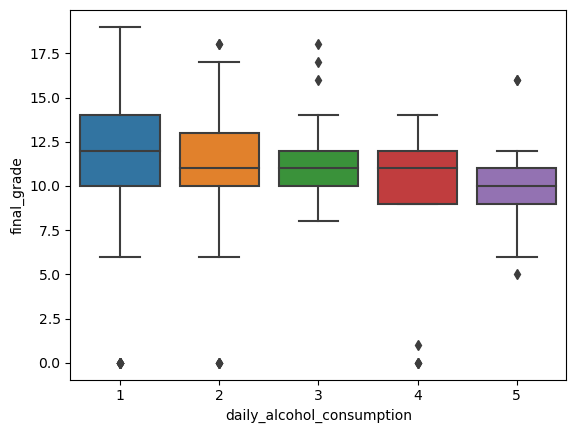

In [42]:
sns.boxplot(data=portuguese, x="daily_alcohol_consumption", y='final_grade')

<Axes: xlabel='weekend_alcohol_consumption', ylabel='final_grade'>

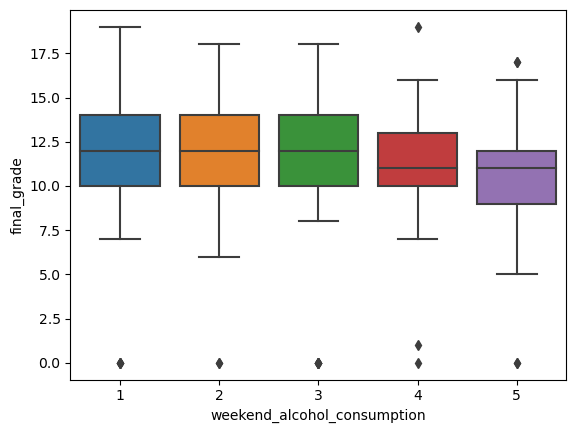

In [43]:
sns.boxplot(data=portuguese, x="weekend_alcohol_consumption", y='final_grade')

<Axes: xlabel='current_health_status', ylabel='final_grade'>

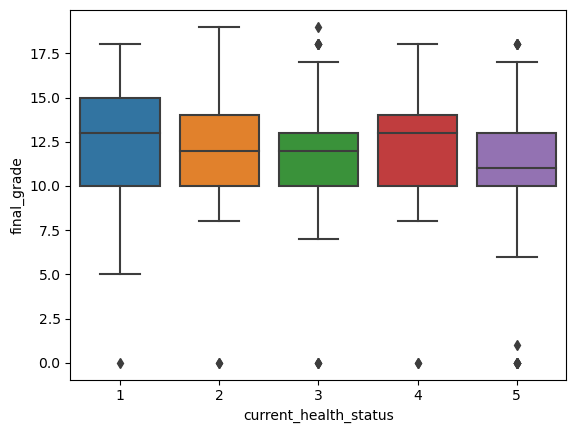

In [44]:
sns.boxplot(data=portuguese, x="current_health_status", y='final_grade')

<Axes: xlabel='absences', ylabel='final_grade'>

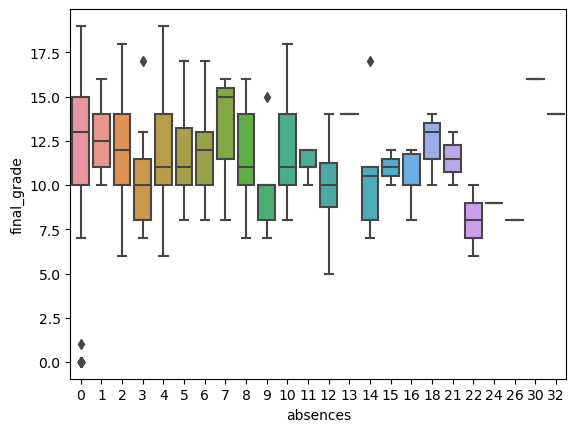

In [45]:
sns.boxplot(data=portuguese, x="absences", y='final_grade')

<Axes: xlabel='first_grade_period', ylabel='final_grade'>

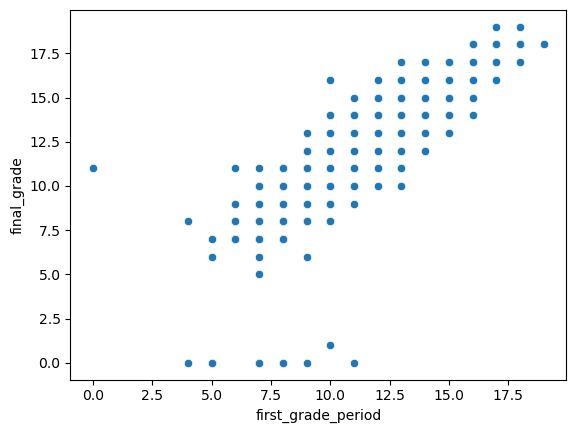

In [46]:
sns.scatterplot(data=portuguese, x="first_grade_period", y='final_grade')

<Axes: xlabel='second_grade_period', ylabel='final_grade'>

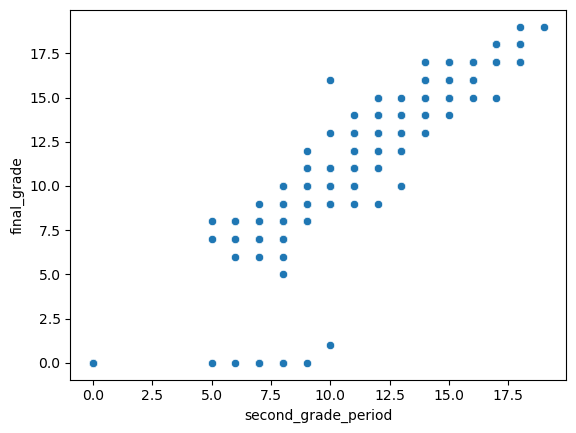

In [47]:
sns.scatterplot(data=portuguese, x="second_grade_period", y='final_grade')